# Decision Trees and Ensembles

# Forest Cover Prediction
In this assignment we are going to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). Cover_Type (7 types, integer 1 to 7). The seven types are:
1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

"Predicting forest cover type from cartographic variables only (no remotely sensed data). The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types)." [https://archive.ics.uci.edu/ml/datasets/covertype] 

In order to classify the forest cover, we will use several different classifiers and compare their results. The classifiers we will use are Decision Trees, Bagging, Boosting, and Random Forest. In this assignemnt you are suppose to use built-in classifiers from `sklearn`. The training, validation, and test partitions are provided. You may need to d some preprocessing, and ofcourse hyper parameter tuning for each classifier.

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
covtype = datasets.fetch_covtype()
X = covtype.data
Y = covtype.target

In [4]:
X.shape, Y.shape

((581012, 54), (581012,))

In [5]:
np.random.seed(0)
perm = np.random.permutation(581012)
trainx = X[perm[0:49500],:]
trainy = Y[perm[0:49500]]
valx = X[perm[49500:55000],:]
valy = Y[perm[49500:55000]]
testx = X[perm[55000:581012],:]
testy = Y[perm[55000:581012]]

In [6]:
sum(trainy==1), sum(trainy==2), sum(trainy==3), sum(trainy==4), sum(trainy==5), sum(trainy==6), sum(trainy==7)

(17945, 24251, 3023, 254, 786, 1481, 1760)

# 1. Decision tree

Best number of n_estimators:  195
Best number of min_samples_split:  2


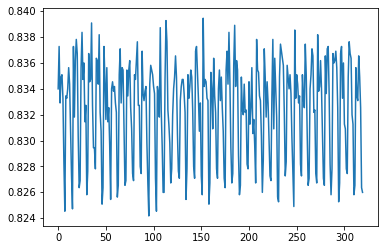

In [16]:
from sklearn.tree import DecisionTreeClassifier
# training and hyper-parameter tuning
#tree = DecisionTreeClassifier(criterion='gini', max_depth=255, min_samples_split=2, min_samples_leaf=1)
#tree.fit(trainx, trainy)
#tree.score(valx,valy)
import matplotlib
import matplotlib.pyplot as plt

def tune_DT(k_max, max_split):
    err = []   
    max_est = 0
    max_err = 0
    best_k = 0
    best_j = 2
    steps = 5
    for x in range(100, k_max, steps):
        for j in range(2, max_split):
            k = x
            tree = DecisionTreeClassifier(criterion='gini', max_depth=k, min_samples_split=j, min_samples_leaf=1)
            tree.fit(trainx, trainy)
            scr = tree.score(valx,valy)
            if scr > max_err:
                max_err = scr
                best_k = k
                best_j = j
            err.append(scr)
    return err, best_k, max_err, best_j

k_max = 300
max_split = 10
err, best_k, max_err, best_j = tune_DT(k_max, max_split)
#print(err)
print("Best number of n_estimators: ", best_k)
print("Best number of min_samples_split: ", best_j)
tree = DecisionTreeClassifier(max_depth=best_k, min_samples_split= best_j)
tree.fit(trainx, trainy)
tree.score(valx,valy)
plt.plot(err)

In [17]:
#test
tree.score(testx,testy)

0.8326064804605218

# 2. Bagging

In [94]:
from sklearn.ensemble import BaggingClassifier
# training and hyper-parameter tuning


def tune_bagging(k_max):
    err = []   
    max_est = 0
    max_err = 0
    best_k = 0
    for x in range(1, k_max):
        k = x
        bag = BaggingClassifier(n_estimators=k)
        bag.fit(trainx, trainy)
        scr = bag.score(valx,valy)
        if scr > max_err:
            max_err = scr
            best_k = k
        err.append(scr)
    return err, best_k, max_err

k_max = 35
err, best_k, max_err = tune_bagging(k_max)
print(err)
print("Best number of n_estimators: ", best_k)
bag = BaggingClassifier(n_estimators=best_k)
bag.fit(trainx, trainy)
bag.score(valx,valy)

[0.7909090909090909, 0.7972727272727272, 0.8490909090909091, 0.8478181818181818, 0.866909090909091, 0.8652727272727273, 0.8741818181818182, 0.8772727272727273, 0.8814545454545455, 0.8838181818181818, 0.8892727272727273, 0.89, 0.889090909090909, 0.8892727272727273, 0.886, 0.8909090909090909, 0.8914545454545455, 0.8921818181818182, 0.8936363636363637, 0.8936363636363637, 0.897090909090909, 0.8925454545454545, 0.8934545454545455, 0.8967272727272727, 0.8961818181818182, 0.896, 0.8947272727272727, 0.8936363636363637, 0.894, 0.8952727272727272, 0.8967272727272727, 0.898, 0.8987272727272727, 0.8941818181818182]
Best number of n_estimators:  33


0.895090909090909

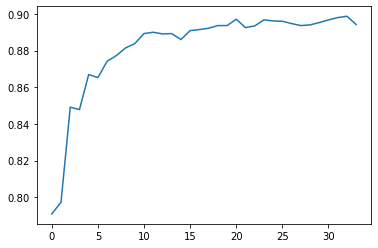

In [99]:
import matplotlib
import matplotlib.pyplot as plt
plt.plot(err)

In [100]:
#test

bag.score(testx,testy)


0.8933028143844627

# 3. AdaBoost

Best number of n_estimators:  6
0.6483636363636364


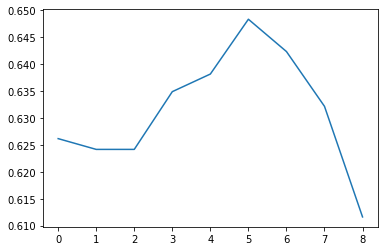

In [114]:
from sklearn.ensemble import AdaBoostClassifier
# training and hyper-parameter tuning
def tune_boosting(k_max, u_max):
    err = []   
    max_est = 0
    max_err = 0
    best_k = 0
    u = 0
    for x in range(1, k_max):
        k = x
        u = u + 1
        clf = AdaBoostClassifier(n_estimators=k, learning_rate=1)
        clf.fit(trainx, trainy)
        scr = clf.score(valx,valy)
        if scr > max_err:
            max_err = scr
            best_k = k
        err.append(scr)
    return err, best_k, max_err

k_max = 10
u_max = 10
err, best_k, max_err = tune_boosting(k_max, u_max)
#print(err)
print("Best number of n_estimators: ", best_k)
clf = AdaBoostClassifier(n_estimators=best_k)
clf.fit(trainx, trainy)
print(clf.score(valx,valy))
plt.plot(err)

In [110]:
#test
clf.score(testx,testy)

0.6532930807662183

# 4. Random Forest

Best number of n_estimators:  62


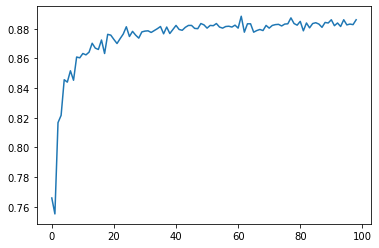

In [113]:
from sklearn.ensemble import RandomForestClassifier
# training and hyper-parameter tuning
def tune_randomforest(k_max):
    err = []   
    max_est = 0
    max_err = 0
    best_k = 0
    for x in range(1, k_max):
        k = x
        clf = RandomForestClassifier(n_estimators=k, max_depth=250, min_samples_split=2, min_samples_leaf=1)
        clf.fit(trainx, trainy)
        scr = clf.score(valx,valy)
        if scr > max_err:
            max_err = scr
            best_k = k
        err.append(scr)
    return err, best_k, max_err

k_max = 100
err, best_k, max_err = tune_randomforest(k_max)
#print(err)
print("Best number of n_estimators: ", best_k)
clf = RandomForestClassifier(n_estimators=best_k)
clf.fit(trainx, trainy)
clf.score(valx,valy)
plt.plot(err)

In [117]:
#test
clf = RandomForestClassifier(n_estimators=62)
clf.fit(trainx, trainy)
print(clf.score(valx,valy))
print(clf.score(testx,testy))

0.8832727272727273
0.8815692417663475


## Questions:

Please report in you submission the following for each classifier:
1. The best result on the validaton set
2. Hyperparameter values for the classifier
3. The result on the test set.

Apart from the above, please provide your comments and observations on the results of the different classifiers. 

## EXTRA

Download the Statlog (Vehicle Silhouettes) Data Set (https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29)

It has 18 features and following four classes:
**OPEL, SAAB, BUS, VAN**

The purpose is to classify a given silhouette as one of four types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. 


Use Decision Tree classifer to train the classifier with train/val/test partition as 70/15/15 (random seed=777)
Fine-tune the tree on the validation set.

1. Report the performance on the test set
2. Extract the decision rules for classifiecation.
3. Plot the decision tree as an image using some library.

**Note:** You have library support in Python for visualizing the learnt decision trees.

# Questions:

1.
    
    a) DT = 0.836
    b) Bagging = 0.895
    c) Boosting = 0.648
    d) rF = 0.883
    

2.

    a) max_depth=195, min_samples_split=2, min_samples_leaf=1
    b) n_estimators:  33
    c) n_estimators:  6
    d) n_estimators:  62 and (max_depth=250, min_samples_split=2, min_samples_leaf=1)
       k = sqrt(d) 
3.

    a) DT = 0.834
    b) Bagging = 0.893
    c) Boosting = 0.653
    d) rF = 0.881
        
        

For this dataset, Bagging strategy outperformed the other three approaches. Boosting was signficantly worse compared to the other three. 